In [31]:
#Imports

import rasterio as rs
from rasterio.plot import show
import matplotlib

##### Reading the TIF Data

In [30]:
fp = r'Resources_Organized/tif/Bestand3.tif'
bestand_tif = rs.open(fp)
show(bestand_tif, aspect='auto')

RasterioIOError: Resources_Organized/Bestand3.tif: No such file or directory

1


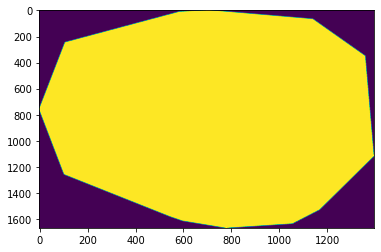

<AxesSubplot:>

In [16]:
# Read the band1 from the tif so we have array data
print(bestand_tif.count)
band1 = bestand_tif.read(1)
show(band1, aspect="auto")

In [26]:
# Convert tif to geometry
from shapely.geometry import Polygon
import rasterio
import rasterio.features
import rasterio.warp

geom_array=[]

with rasterio.open("Resources_Organized/tif/Bestand3.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        # geom = rasterio.warp.transform_geom(
        #     dataset.crs, 'EPSG:4326', geom, precision=6)
        geom_array.append(Polygon(geom["coordinates"][0]))

<AxesSubplot:>

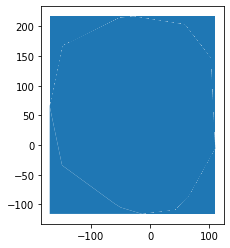

In [27]:
forest = gpd.GeoDataFrame(geometry=geom_array)   
forest.plot()

#### And add the trees to the map

In [56]:
from shapely.geometry import Point
import pandas as pd
from pandas.api.types import is_string_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#load the data and show that we have correctly parsed the CSV
with open("Resources_Organized/csv/Bestand3_h.csv") as file:
    bestand_3_csv = pd.read_csv(file,sep="\t",dtype=str)

for column in  ["x","y","z","id"]:
    if is_string_dtype(bestand_3_csv[column]):
        bestand_3_csv[column] = bestand_3_csv[column].str.replace(',', '.').astype(float)
    bestand_3_csv[column] = pd.to_numeric(bestand_3_csv[column])

print(bestand_3_csv.head())
print(bestand_3_csv.dtypes)

<AxesSubplot:>

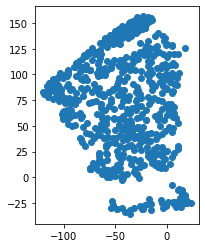

In [48]:
point_list = [Point(xy) for xy in zip(bestand_3_csv["x"], bestand_3_csv["y"])]
tree_gpd = gpd.GeoDataFrame(data=bestand_3_csv,geometry=point_list)
tree_gpd.plot()

<AxesSubplot:>

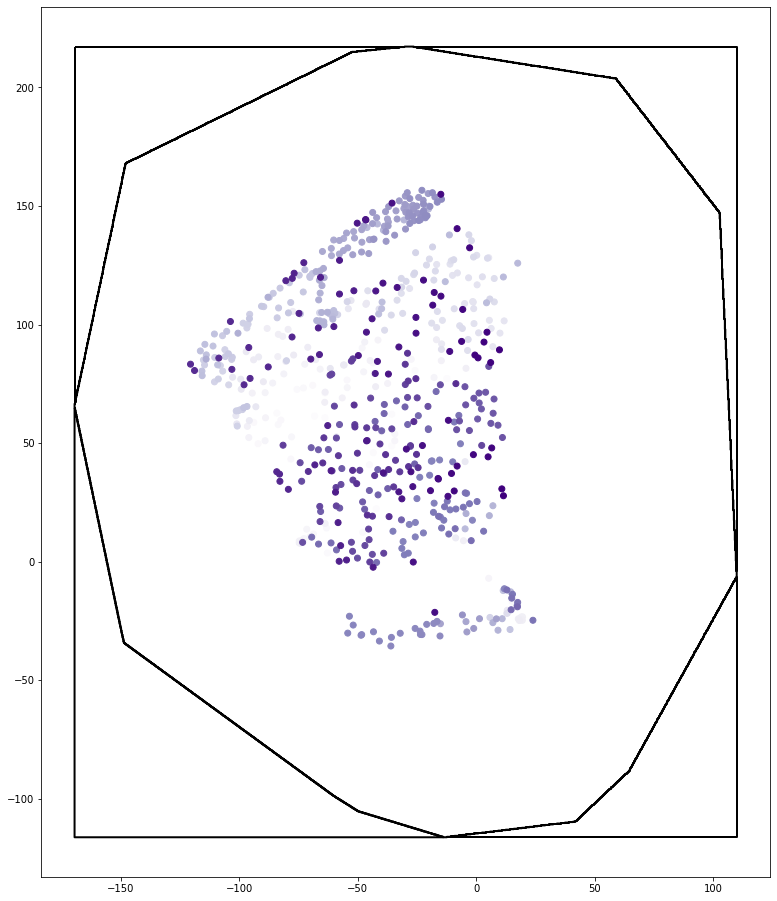

In [59]:
fig, ax = plt.subplots(figsize = (20,16)) 
tree_gpd.plot(cmap = 'Purples',ax=ax)
forest.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax) #Use your second dataframe

#### Function Planning

- What do we actually need for our computations?

1. Distances, angles between two points (ie. trees)
-> Easy, euclidean distance and some trigonometry
2. Check intersection with shapefiles
-> This can be skipped as req for now
3. Designate areas for roads, anchor trees and so on
-> manually draw those in - need a tool to allow to draw lines and polygons into our matrix
    1. This should probably happen on the raster map? So we have z coordinates
    2. Nope, we can use the geopandas area - they provide adequate geometry functions (isdisjoint, contains, areas, lines,...)
4. Computation of sample line:
    1. ID possible starting points and their cost
        1. Walk along street path
        2. Each 1m, test if:
            1. we find suitable anchor tree 
        1. Set line as vector
        2. Get distances of trees (scaling them with distance)
        3. 
- Ist es ein MIP, MILP Problem?
- Was ist die Kostenfunktion, was sind die Nebenbedingungen?
- Was sind die Variablentypen?